# Kasus - Klasifikasi Tulisan Tangan dengan Dataset MNIST

## Deskripsi Umum
Anda diminta untuk melakukan klasifikasi dengan menggunakan algoritma Naive Bayes dan SVM untuk merekognisi tulisan tangan dari dataset MNIST

## Tentang Dataset MNIST

Dataset MNIST (Modified National Institute of Standards and Technology) merupakan dataset berupa citra grayscale dengan ukuran 28x28 yang berisi tulisan tangan dari digit angka 0-9. Jumlah data dalam dataset ini adalah 70.000 data.

## Detail Kuis

1. Pastikan jumlah data setiap label angka (0-9). Apakah terdapat data imbalance pada dataset MNIST yang digunakan? Jelaskan jawaban kelompok Anda dan buktikan!

2. Tampilkan 15 buah citra pertama dari dataset MNIST berserta labelnya. Anda dapat menggunakan referensi dari Job Sheet 03.

3. Lakukan proses ekstraksi fitur pada data MNIST. Pada proses ini, Anda diperbolehkan untuk
    - Langsung menggunakan nilai asli dari citra (nilai asli setiap pixel dari dataset) sebagai fitur.
    - Melakukan ekstraksi fitur lain seperti histogram, PCA, atau yang lainnya. Anda diperbolehkan melakukan ekspolarasi pada proses ini.

4. Buatlah data training dan data testing menggunakan rasio 70:30, 80:20, 90:10.

4. Lakukan proses klasifikasi dengan menggunakan algoritma Naive Bayes dan SVM.
   - Anda diperbolehkan untuk melakukan tunning parameter.
   - Anda diperbolehkan mengeksplorasi jenis kernel yang digunakan pada SVM.

5. Evaluasi model yang Anda buat terhadap data training dan data testing.
   - Gunakan metric *accuracy* untuk mengetahui tingkat akurasi data training dan data testing.
   - Gunakan fungsi *classification_report* untuk mengetahui performa model secara holistik.
   - Gunakan confusion matrix untuk mengetahui tingkat ketepatan pelabelan.

6. Tampilkan citra data testing berserta hasil pelabelannya. Anda dapat menggunakan Job Sheet 03 sebagai acuan.

7. Apa model terbaik yang Anda dapatkan? Bagaimana konfigurasinya? Berapa tingkat akurasi yang didapatkan? Jelaskan!

# Bantuan

Berikut merupakan kode bantuan untuk proses mengunduh dataset MNIST

In [18]:
# Unduh Dataset MNIST
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version = 1, as_frame = False)

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [19]:
# Baca deskripsi dataset
# Tahap ini mungkin diperlukan untuk lebih memahami dataset
print(mnist.DESCR)

**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  
**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  
**Please cite**:  

The MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  

It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 image b

In [3]:
# Inspeksi semua key dalam dataset
# Cara ini digunakan untuk memahami struktur dari dataset MNIST
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

(array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], dtype=object), array([6903, 7877, 6990, 7141, 6824, 6313, 6876, 7293, 6825, 6958]))


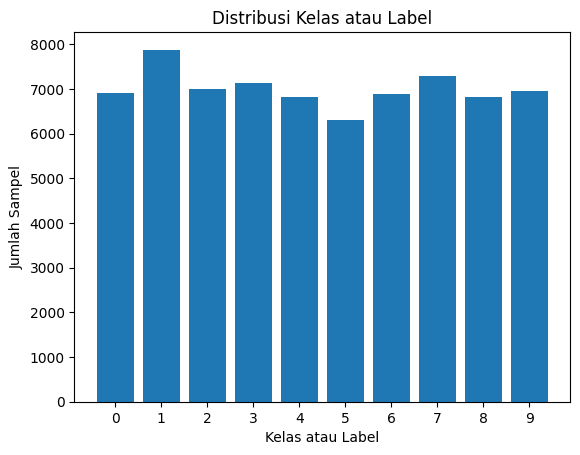

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml

# Mengunduh dataset MNIST
mnist = fetch_openml('mnist_784', version=1, as_frame=False)

label_counts = np.unique(mnist.target, return_counts=True)

# Menampilkan jumlah data dari setiap label
print(label_counts)

unique_labels, label_counts = np.unique(mnist.target, return_counts=True)
plt.bar(unique_labels, label_counts)
plt.xlabel('Kelas atau Label')
plt.ylabel('Jumlah Sampel')
plt.title('Distribusi Kelas atau Label')
plt.xticks(unique_labels)
plt.show()

In [5]:
# Menghitung jumlah data untuk setiap label (0-9)
label_counts = np.bincount(mnist.target.astype(int))

# Menampilkan jumlah data untuk setiap label
for i in range(10):
    print(f"Data Count for Label {i}: {label_counts[i]}")

Data Count for Label 0: 6903
Data Count for Label 1: 7877
Data Count for Label 2: 6990
Data Count for Label 3: 7141
Data Count for Label 4: 6824
Data Count for Label 5: 6313
Data Count for Label 6: 6876
Data Count for Label 7: 7293
Data Count for Label 8: 6825
Data Count for Label 9: 6958


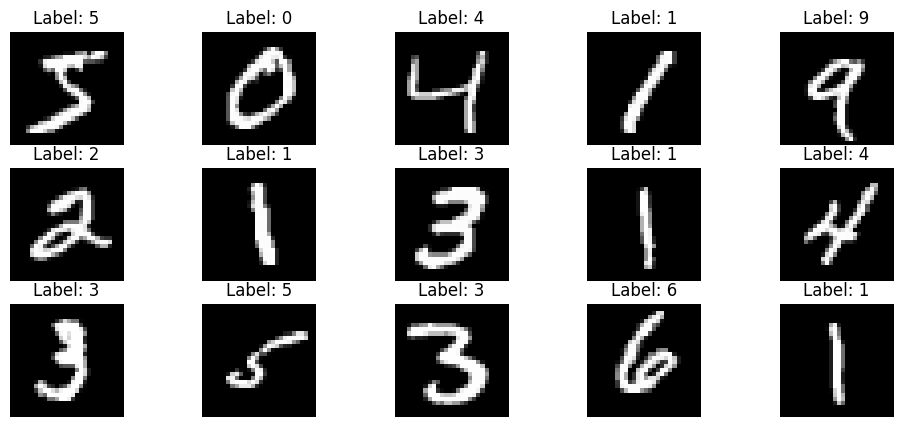

In [20]:
# Mengambil data dan label
X = mnist.data
y = mnist.target

# Menampilkan 15 citra pertama berserta labelnya
plt.figure(figsize=(12, 5))
for i in range(15):
    plt.subplot(3, 5, i + 1)
    plt.imshow(X[i].reshape(28, 28), cmap='gray')
    plt.title(f'Label: {y[i]}')
    plt.axis('off')

plt.show()

# Nomor 3: Lakukan proses ekstraksi fitur pada data MNIST. Pada proses ini, Anda diperbolehkan untuk

Melakukan ekstraksi fitur lain seperti histogram, PCA, atau yang lainnya. Anda diperbolehkan melakukan ekspolarasi pada proses ini.

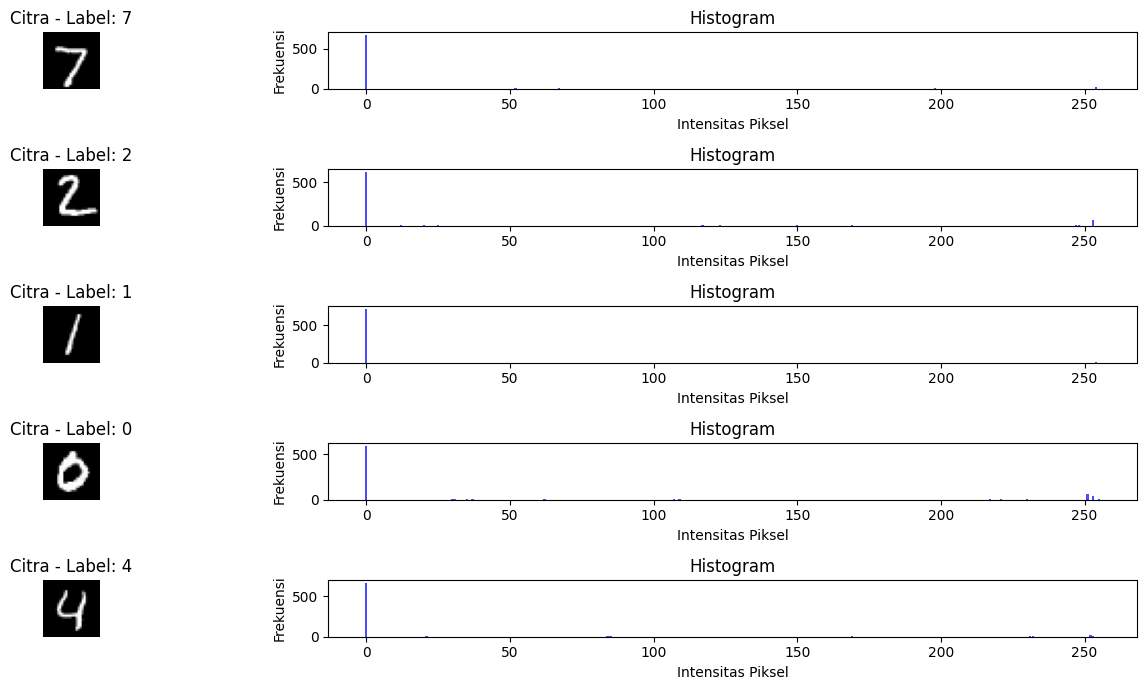

In [29]:
import matplotlib.pyplot as plt
from keras.datasets import mnist
# Memuat data MNIST
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Menampilkan citra dan histogram dari data pengujian
num_images_to_display = 5

# 1. Ekstraksi Fitur (Histogram)
def extract_histogram_features(image):
    histogram, _ = np.histogram(image.flatten(), bins=256, range=[0,256])
    return histogram

# Fungsi untuk menampilkan citra dan histogram
def display_images_with_histograms(images, histograms, labels, num_images):
    plt.figure(figsize=(15, 7))
    for i in range(num_images):
        plt.subplot(num_images, 2, 2*i + 1)
        plt.imshow(images[i].reshape((28, 28)), cmap='gray')
        plt.title(f"Citra - Label: {labels[i]}")
        plt.axis('off')

        plt.subplot(num_images, 2, 2*i + 2)
        plt.bar(range(256), histograms[i], color='blue', alpha=0.7)
        plt.title("Histogram")
        plt.xlabel("Intensitas Piksel")
        plt.ylabel("Frekuensi")

    plt.tight_layout()
    plt.show()

# Ekstraksi fitur dan histogram untuk setiap data gambar
X_train_histograms = np.array([extract_histogram_features(image) for image in X_train])
X_test_histograms = np.array([extract_histogram_features(image) for image in X_test])

# Menampilkan citra dan histogram dari data pengujian
display_images_with_histograms(X_test[:num_images_to_display], X_test_histograms[:num_images_to_display], y_test[:num_images_to_display], num_images_to_display)


# Nomor 4: Buatlah data training dan data testing menggunakan rasio 70:30, 80:20, 90:10.

Rasio 70:30

In [30]:
from sklearn.model_selection import train_test_split

# Bagi data menjadi 70% data pelatihan dan 30% data pengujian
X_train_70, X_test_70, y_train_70, y_test_70 = train_test_split(X_train, y_train, test_size=0.3, random_state=42)

# Hasil dari pembagian data
print("Data Train Count:", len(X_train_70))
print("Data Test Count:", len(X_test_70))

Data Train Count: 42000
Data Test Count: 18000


Rasio 80:20

In [31]:
from sklearn.model_selection import train_test_split

# Bagi data menjadi 80% data pelatihan dan 20% data pengujian
X_train_80, X_test_80, y_train_80, y_test_80 = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Hasil dari pembagian data
print("Data Train Count:", len(X_train_80))
print("Data Test Count:", len(X_test_80))

Data Train Count: 48000
Data Test Count: 12000


Rasio 90:10

In [32]:
from sklearn.model_selection import train_test_split

# Bagi data menjadi 90% data pelatihan dan 10% data pengujian
X_train_90, X_test_90, y_train_90, y_test_90 = train_test_split(X_train, y_train, test_size=0.3, random_state=42)

# Hasil dari pembagian data
print("Data Train Count:", len(X_train_90))
print("Data Test Count:", len(X_test_90))

Data Train Count: 42000
Data Test Count: 18000


# Nomor 5: Lakukan proses klasifikasi dengan menggunakan algoritma Naive Bayes dan SVM

Naive Bayes -> Gaussian

In [42]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Inisialisasi model Gaussian Naive Bayes
model = GaussianNB()

# Melakukan flattening pada data gambar (2D)
X_train_70_flat = X_train_70.reshape((X_train_70.shape[0], -1))
X_test_70_flat = X_test_70.reshape((X_test_70.shape[0], -1))

# Latih model dengan rasio 70:30
model.fit(X_train_70_flat, y_train_70)

# Klasifikasi untuk rasio 70:30
y_pred_70 = model.predict(X_test_70_flat)
accuracy_70 = accuracy_score(y_test_70, y_pred_70)
print("Akurasi Model (70:30): {:.2f}%".format(accuracy_70 * 100))

# rasio 80:20

# Melakukan flattening pada data gambar (2D)
X_train_80_flat = X_train_80.reshape((X_train_80.shape[0], -1))
X_test_80_flat = X_test_80.reshape((X_test_80.shape[0], -1))

# Latih model dengan rasio 80:20
model.fit(X_train_80_flat, y_train_80)

# Klasifikasi untuk rasio 80:20
y_pred_80 = model.predict(X_test_80_flat)
accuracy_80 = accuracy_score(y_test_80, y_pred_80)
print("Akurasi Model (80:20): {:.2f}%".format(accuracy_80 * 100))

# rasio 90:10

# Melakukan flattening pada data gambar (2D)
X_train_90_flat = X_train_90.reshape((X_train_90.shape[0], -1))
X_test_90_flat = X_test_90.reshape((X_test_90.shape[0], -1))

# Latih model dengan rasio 90:10
model.fit(X_train_90_flat, y_train_90)

# Klasifikasi untuk rasio 90:10
y_pred_90 = model.predict(X_test_90_flat)
accuracy_90 = accuracy_score(y_test_90, y_pred_90)
print("Akurasi Model (90:10): {:.2f}%".format(accuracy_90 * 100))


Akurasi Model (70:30): 56.38%
Akurasi Model (80:20): 56.01%
Akurasi Model (90:10): 56.38%


# Accuracy, Classification, Confusion Matrix: Data Training



In [44]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# ========== Rasio 70:30 ==========
# Melakukan prediksi pada data pelatihan
y_train_pred_70 = model.predict(X_train_70_flat)

# Menghitung akurasi pada data pelatihan
accuracy_train_70 = accuracy_score(y_train_70, y_train_pred_70)
print("Akurasi pada Data Pelatihan (Rasio 70:30):", accuracy_train_70)

# Laporan Klasifikasi pada data pelatihan
classification_report_train_70 = classification_report(y_train_70, y_train_pred_70)
print("Laporan Klasifikasi pada Data Pelatihan (Rasio 70:30):\n", classification_report_train_70)

# Matriks Kebingungan pada data pelatihan
confusion_matrix_train_70 = confusion_matrix(y_train_70, y_train_pred_70)
print("Matriks Kebingungan pada Data Pelatihan (Rasio 70:30):\n\n", confusion_matrix_train_70)

# ========== Rasio 80:20 ==========
# Melakukan prediksi pada data pelatihan
y_train_pred_80 = model.predict(X_train_80_flat)

# Menghitung akurasi pada data pelatihan
accuracy_train_80 = accuracy_score(y_train_80, y_train_pred_80)
print("Akurasi pada Data Pelatihan (Rasio 80:20):", accuracy_train_80)

# Laporan Klasifikasi pada data pelatihan
classification_report_train_80 = classification_report(y_train_80, y_train_pred_80)
print("Laporan Klasifikasi pada Data Pelatihan (Rasio 80:20):\n", classification_report_train_80)

# Matriks Kebingungan pada data pelatihan
confusion_matrix_train_80 = confusion_matrix(y_train_80, y_train_pred_80)
print("Matriks Kebingungan pada Data Pelatihan (Rasio 80:20):\n\n", confusion_matrix_train_80)

# ========== Rasio 90:10 ==========
# Melakukan prediksi pada data pelatihan
y_train_pred_90 = model.predict(X_train_90_flat)

# Menghitung akurasi pada data pelatihan
accuracy_train_90 = accuracy_score(y_train_90, y_train_pred_90)
print("Akurasi pada Data Pelatihan (Rasio 90:10):", accuracy_train_90)

# Laporan Klasifikasi pada data pelatihan
classification_report_train_90 = classification_report(y_train_90, y_train_pred_90)
print("Laporan Klasifikasi pada Data Pelatihan (Rasio 90:10):\n", classification_report_train_90)

# Matriks Kebingungan pada data pelatihan
confusion_matrix_train_90 = confusion_matrix(y_train_90, y_train_pred_90)
print("Matriks Kebingungan pada Data Pelatihan (Rasio 90:10):\n", confusion_matrix_train_90)


Akurasi pada Data Pelatihan (Rasio 70:30): 0.5663571428571429
Laporan Klasifikasi pada Data Pelatihan (Rasio 70:30):
               precision    recall  f1-score   support

           0       0.78      0.87      0.83      4118
           1       0.78      0.95      0.85      4748
           2       0.88      0.36      0.51      4199
           3       0.78      0.38      0.51      4285
           4       0.85      0.18      0.30      4116
           5       0.71      0.09      0.15      3768
           6       0.65      0.94      0.77      4131
           7       0.92      0.29      0.44      4328
           8       0.29      0.58      0.39      4121
           9       0.36      0.95      0.52      4186

    accuracy                           0.57     42000
   macro avg       0.70      0.56      0.53     42000
weighted avg       0.70      0.57      0.53     42000

Matriks Kebingungan pada Data Pelatihan (Rasio 70:30):

 [[3596    9   25   10   12   11  160    3  189  103]
 [   1 4493  

# Accuracy, Classification, Confusion Matrix: Data Testing


In [46]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# ========== Rasio 70:30 ==========
# Melakukan prediksi pada data pengujian
y_test_pred_30 = model.predict(X_test_70_flat)

# Menghitung akurasi pada data pengujian
accuracy_test_30 = accuracy_score(y_test_70, y_test_pred_30)
print("Akurasi pada Data Pengujian (Rasio 70:30):", accuracy_test_30)

# Laporan Klasifikasi pada data pengujian
classification_report_test_30 = classification_report(y_test_70, y_test_pred_30)
print("Laporan Klasifikasi pada Data Pengujian (Rasio 70:30):\n", classification_report_test_30)

# Matriks Kebingungan pada data pengujian
confusion_matrix_test_30 = confusion_matrix(y_test_70, y_test_pred_30)
print("Matriks Kebingungan pada Data Pengujian (Rasio 70:30):\n", confusion_matrix_test_30)

# ========== Rasio 80:20 ==========
# Melakukan prediksi pada data pengujian
y_test_pred_20 = model.predict(X_test_80_flat)

# Menghitung akurasi pada data pengujian
accuracy_test_20 = accuracy_score(y_test_80, y_test_pred_20)
print("Akurasi pada Data Pengujian (Rasio 80:20):", accuracy_test_20)

# Laporan Klasifikasi pada data pengujian
classification_report_test_20 = classification_report(y_test_80, y_test_pred_20)
print("Laporan Klasifikasi pada Data Pengujian (Rasio 80:20):\n", classification_report_test_20)

# Matriks Kebingungan pada data pengujian
confusion_matrix_test_20 = confusion_matrix(y_test_80, y_test_pred_20)
print("Matriks Kebingungan pada Data Pengujian (Rasio 80:20):\n", confusion_matrix_test_20)

# ========== Rasio 90:10 ==========
# Melakukan prediksi pada data pengujian
y_test_pred_10 = model.predict(X_test_90_flat)

# Menghitung akurasi pada data pengujian
accuracy_test_10 = accuracy_score(y_test_90, y_test_pred_10)
print("Akurasi pada Data Pengujian (Rasio 90:10):", accuracy_test_10)

# Laporan Klasifikasi pada data pengujian
classification_report_test_10 = classification_report(y_test_90, y_test_pred_10)
print("Laporan Klasifikasi pada Data Pengujian (Rasio 90:10):\n", classification_report_test_10)

# Matriks Kebingungan pada data pengujian
confusion_matrix_test_10 = confusion_matrix(y_test_90, y_test_pred_10)
print("Matriks Kebingungan pada Data Pengujian (Rasio 90:10):\n", confusion_matrix_test_10)


Akurasi pada Data Pengujian (Rasio 70:30): 0.5638333333333333
Laporan Klasifikasi pada Data Pengujian (Rasio 70:30):
               precision    recall  f1-score   support

           0       0.79      0.86      0.82      1805
           1       0.78      0.94      0.85      1994
           2       0.84      0.36      0.50      1759
           3       0.77      0.39      0.52      1846
           4       0.85      0.20      0.32      1726
           5       0.66      0.08      0.14      1653
           6       0.65      0.94      0.77      1787
           7       0.91      0.28      0.43      1937
           8       0.29      0.58      0.38      1730
           9       0.36      0.96      0.52      1763

    accuracy                           0.56     18000
   macro avg       0.69      0.56      0.53     18000
weighted avg       0.69      0.56      0.53     18000

Matriks Kebingungan pada Data Pengujian (Rasio 70:30):
 [[1561    3   14    2    0    2   81    1   89   52]
 [   2 1869   

# Tampilkan citra data testing berserta hasil pelabelannya. Anda dapat menggunakan Job Sheet 03 sebagai acuan.

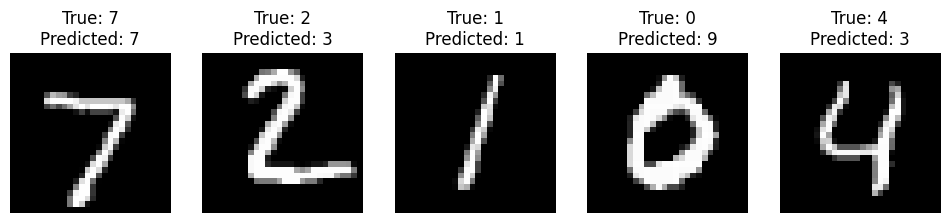

In [49]:
def display_images_with_predictions(images, true_labels, predicted_labels, num_images):
    plt.figure(figsize=(12, 3))
    for i in range(num_images):
        plt.subplot(1, num_images, i + 1)
        plt.imshow(images[i].reshape((28, 28)), cmap='gray')
        title = f"True: {true_labels[i]}\nPredicted: {predicted_labels[i]}"
        plt.title(title)
        plt.axis('off')
    plt.show()

# Menampilkan citra dari data pengujian dengan prediksi (rasio 80:20)
num_images_to_display = 5
y_pred_test_80 = model.predict(X_test_70_flat)
display_images_with_predictions(X_test[:num_images_to_display], y_test[:num_images_to_display], y_pred_test_80[:num_images_to_display], num_images_to_display)
